# UAS

## 1. Data Set
https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)

{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'ID': 419, 'type': 'NATIVE', 'title': 'Transfer Learning with Partial Observability Applied to Cervi

## 2. Data Understanding

Dataset Cervical Cancer Risk Factors diambil langsung dari UCI menggunakan ucimlrepo. Setelah data dimuat, fitur (X) dan target (y) digabungkan menjadi satu DataFrame untuk memudahkan eksplorasi.

Simbol '?' yang menandakan nilai kosong diganti menjadi pd.NA agar bisa dikenali sebagai missing value oleh pandas. Kemudian dilakukan perhitungan jumlah missing value per kolom, untuk melihat sebarannya.

Setelah itu, seluruh kolom dataset dikonversi ke numerik. Jika ada nilai yang gagal dikonversi (karena '?' atau teks), akan otomatis menjadi NaN.

Akhirnya, data numerik divisualisasikan menggunakan boxplot untuk mendeteksi outlier pada beberapa kolom pertama. Ini penting untuk memahami sebaran dan potensi ekstrem value pada variabel input yang digunakan dalam model.


Jumlah missing value per kolom:
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
ST

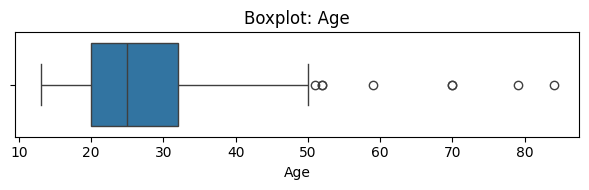

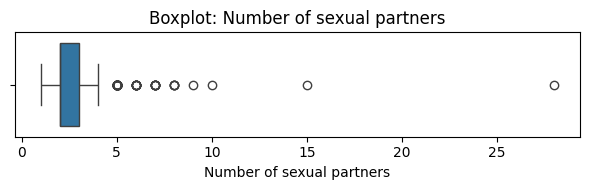

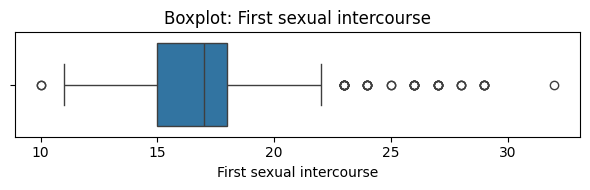

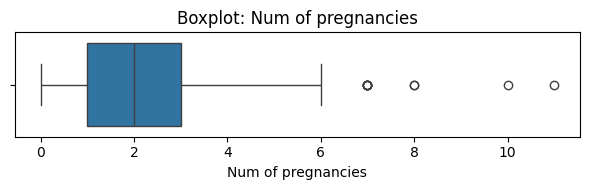

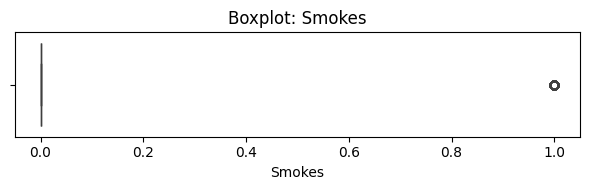

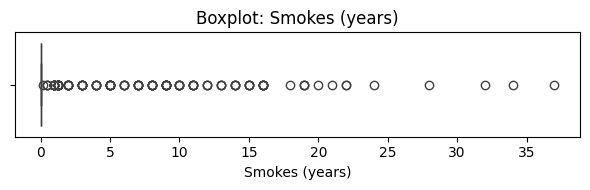

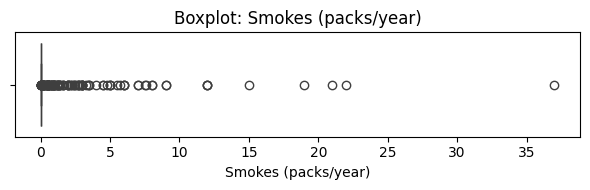

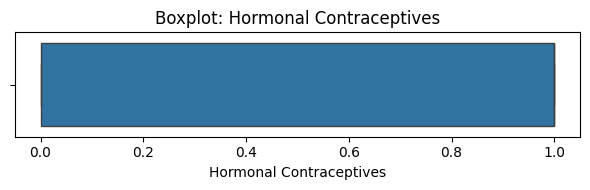

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ambil dataset Cervical Cancer Risk Factors dari UCI
data = fetch_ucirepo(id=383)

# 2. Pisahkan fitur dan target
X = data.data.features
y = data.data.targets

# Gabungkan fitur dan target menjadi satu DataFrame untuk eksplorasi awal
df = pd.concat([X, y], axis=1)

# 3. Ganti simbol "?" dengan NaN agar bisa diproses sebagai missing value
df.replace("?", pd.NA, inplace=True)

# 4. Tampilkan jumlah missing value per kolom
missing = df.isna().sum()
print("Jumlah missing value per kolom:")
print(missing[missing > 0])

# 5. Konversi semua kolom ke numerik (yang bisa), NaN jika gagal
df = df.apply(pd.to_numeric, errors='coerce')

# 6. Visualisasi outlier dengan boxplot pada kolom numerik
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Pilih subset kolom numerik untuk visualisasi agar tidak terlalu banyak
subset = numeric_cols[:8]  # ambil 8 pertama dulu sebagai contoh

for col in subset:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

## 3. Preprocessing

Proses dimulai dengan menangani nilai hilang (NaN) yang sebelumnya muncul akibat konversi dari '?'. Missing value diisi menggunakan strategi median, yang lebih robust terhadap outlier dibandingkan mean. Proses ini dilakukan menggunakan SimpleImputer dari sklearn.

Setelah semua nilai hilang berhasil diisi, pengecekan dilakukan untuk memastikan tidak ada lagi NaN yang tersisa. Hal ini penting agar model pembelajaran mesin tidak gagal saat proses pelatihan.

Langkah berikutnya adalah melakukan standarisasi fitur numerik menggunakan StandardScaler. Ini penting khususnya untuk model seperti Support Vector Machine atau KNN, karena model-model tersebut sensitif terhadap skala fitur. Skala fitur diubah menjadi distribusi dengan rata-rata 0 dan standar deviasi 1.

Akhirnya, fitur (X_scaled) dan target (y) dipisahkan kembali, dengan fokus pada kolom target Biopsy.


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Mengisi missing value dengan median
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 2. Pastikan semua kolom sudah numerik dan tidak ada NaN
print("Apakah masih ada missing value?:", df_imputed.isnull().sum().sum())

# 3. Standarisasi fitur (opsional tapi disarankan untuk model seperti SVM)
scaler = StandardScaler()

# Pisahkan kembali fitur dan target
X_scaled = scaler.fit_transform(df_imputed.drop(["Hinselmann", "Schiller", "Citology", "Biopsy"], axis=1))
y = df_imputed["Biopsy"]  # fokus ke target Biopsy

# Konversi X_scaled ke DataFrame agar mudah dibaca
X_scaled = pd.DataFrame(X_scaled, columns=df_imputed.drop(["Hinselmann", "Schiller", "Citology", "Biopsy"], axis=1).columns)

# Tampilkan bentuk data akhir
print("Ukuran data fitur:", X_scaled.shape)
print("Jumlah target positif (Biopsy=1):", y.sum())

Apakah masih ada missing value?: 0
Ukuran data fitur: (858, 32)
Jumlah target positif (Biopsy=1): 55.0


## 4. Modelling
  
  1. Decision Tree

2. Random Forest

3. Support Vector Machine (SVM)


Setelah data dipersiapkan pada tahap preprocessing, proses modelling dilakukan untuk memprediksi risiko kanker serviks dengan target variabel `Biopsy` yang bernilai 0 (negatif) atau 1 (positif). Karena data target sangat tidak seimbang (kelas 1 jauh lebih sedikit daripada kelas 0), perlu strategi khusus dalam pemodelan agar model tidak bias terhadap mayoritas.

### Membagi Data

Langkah awal adalah membagi data menjadi dua bagian: data latih (80%) dan data uji (20%). Proses pembagian ini dilakukan dengan `stratify=y`, yang memastikan bahwa proporsi antara kelas 0 dan kelas 1 tetap seimbang di kedua set. Ini penting agar model mendapatkan representasi yang baik dari kedua kelas saat dilatih dan diuji.

### Menyiapkan Tiga Model

Tiga algoritma klasifikasi populer digunakan:

* Decision Tree: Membuat pohon keputusan berdasarkan fitur yang paling memisahkan data.
* Random Forest: Menggabungkan banyak decision tree untuk meningkatkan akurasi dan stabilitas.
* Support Vector Machine (SVM): Mencari hyperplane terbaik yang memisahkan dua kelas dengan margin maksimal.

Semua model diatur dengan parameter `class_weight="balanced"` untuk memberi bobot lebih besar pada kelas minoritas (1). Hal ini bertujuan agar model tidak hanya fokus pada prediksi mayoritas (0), tetapi juga memperhatikan kelas minoritas yang lebih penting secara klinis.

### Melatih dan Menguji Model

Setiap model dilatih dengan data latih dan diuji pada data uji. Setelah prediksi dilakukan, dilakukan evaluasi menyeluruh menggunakan metrik klasifikasi:

* Accuracy: Seberapa banyak prediksi yang benar.
* Precision: Dari semua prediksi positif, berapa yang benar-benar positif.
* Recall: Dari semua kasus positif sebenarnya, berapa yang berhasil ditemukan oleh model.
* F1-Score: Rata-rata harmonis dari precision dan recall, sangat penting dalam kasus data imbalance.

Untuk menghindari error pada evaluasi, metrik disusun dengan menyebut label secara eksplisit `[0, 1]`, dan `zero_division=0` digunakan agar tidak muncul error ketika tidak ada nilai prediksi positif.

### Menyusun Perbandingan

Hasil evaluasi dari ketiga model disimpan dalam sebuah tabel agar dapat dibandingkan langsung. Tabel ini membantu menentukan model mana yang memberikan keseimbangan terbaik antara kemampuan mengenali kasus positif (recall) dan kemampuan menghindari prediksi positif palsu (precision).



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y  # stratify agar seimbang proporsinya
)

# 2. Inisialisasi model dengan penanganan imbalance
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(random_state=42, class_weight="balanced")
}

# 3. Latih dan evaluasi semua model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Pastikan label 0 dan 1 ada dalam evaluasi
    report = classification_report(
        y_test, y_pred, labels=[0, 1], output_dict=True, zero_division=0
    )

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }

    # Print laporan lengkap
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# 4. Tabel perbandingan kinerja model
df_results = pd.DataFrame(results).T
print("\n Perbandingan Kinerja 3 Model:")
print(df_results.round(2))


=== Decision Tree ===
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       161
         1.0       0.14      0.09      0.11        11

    accuracy                           0.91       172
   macro avg       0.54      0.53      0.53       172
weighted avg       0.89      0.91      0.90       172

Accuracy: 0.9069767441860465

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       161
         1.0       0.50      0.09      0.15        11

    accuracy                           0.94       172
   macro avg       0.72      0.54      0.56       172
weighted avg       0.91      0.94      0.91       172

Accuracy: 0.936046511627907

=== SVM ===
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       161
         1.0       0.00      0.00      0.00        11

    accuracy                           0.86       172
   macro avg

## 5. Evaluasi

Visualisasi pertama menampilkan Confusion Matrix dari setiap model. Matriks ini menunjukkan berapa banyak kasus positif dan negatif yang diklasifikasikan dengan benar maupun salah. Nilai True Positive (1 diklasifikasi 1) adalah yang paling penting dalam konteks deteksi kanker.

Langkah berikutnya adalah membuat ROC Curve, yang memvisualisasikan keseimbangan antara sensitivitas (True Positive Rate) dan 1 - spesifisitas (False Positive Rate). Model yang baik akan memiliki kurva menjauh dari garis diagonal dan AUC (Area Under Curve) mendekati 1.

Akhirnya, ditampilkan bar chart perbandingan skor dari masing-masing model berdasarkan hasil evaluasi sebelumnya (Accuracy, Precision, Recall, dan F1-Score). Grafik ini membantu membandingkan performa ketiganya secara visual dan cepat.

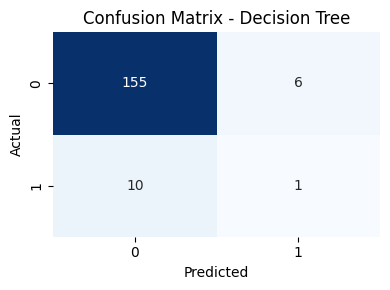

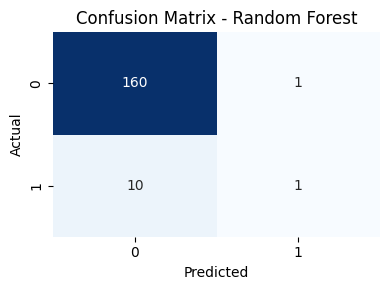

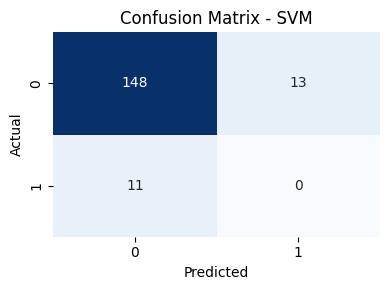

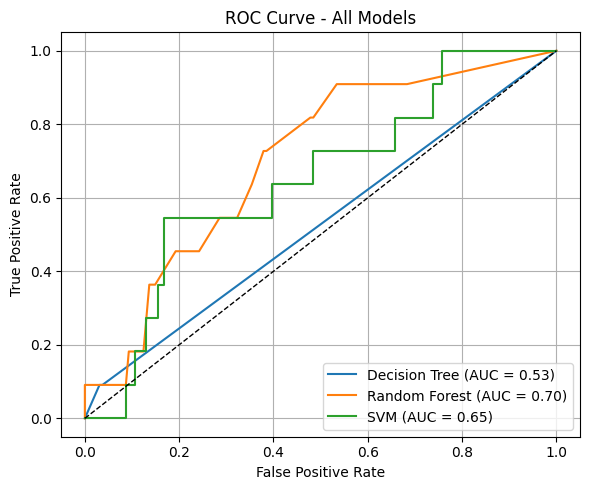

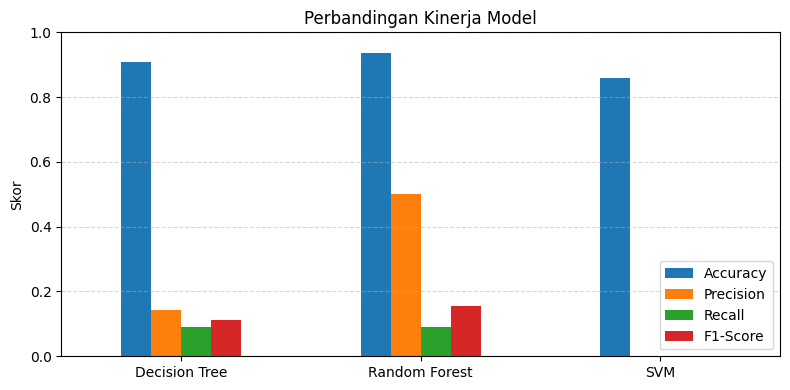

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Konversi y_test ke numpy agar kompatibel
y_test_np = y_test.to_numpy()

# 1. Confusion Matrix untuk semua model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 2. ROC Curve untuk semua model
plt.figure(figsize=(6, 5))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_np, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Bar Chart: Perbandingan skor model
df_results.plot(kind="bar", figsize=(8, 4))
plt.title("Perbandingan Kinerja Model")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Link Web

https://vigilant-happiness-x54rrp7v9gqcpjr6-8501.app.github.dev/